<a href="https://colab.research.google.com/github/rudraneel18/MNIST-Dataset-Model/blob/main/MNIST(Opt%20RMSProp).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle competitions download -c digit-recognizer

 59% 9.00M/15.3M [00:00<00:00, 9.42MB/s]
100% 15.3M/15.3M [00:00<00:00, 17.2MB/s]


In [3]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as layers
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow_datasets as tfds

In [4]:
data = pd.read_csv('/content/train.csv')

x_data = data.drop(labels='label', axis=1)
y_data = data['label']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.2)

data_for_prediction = pd.read_csv('/content/test.csv')

In [5]:
x_train = x_train.to_numpy().reshape((x_train.shape[0], 28, 28, 1))
x_train = tf.convert_to_tensor(x_train)

y_train = to_categorical(tf.convert_to_tensor(y_train.to_numpy()))

x_test = x_test.to_numpy().reshape((x_test.shape[0], 28, 28, 1))
x_test = tf.convert_to_tensor(x_test)

y_test = to_categorical(tf.convert_to_tensor(y_test.to_numpy()))

data_for_prediction = data_for_prediction.to_numpy().reshape((data_for_prediction.shape[0], 28, 28, 1))

In [6]:
model = Sequential()

# Scaling pixel values from 0-255 to 0-1
model.add(layers.Rescaling(1./255))

# Data augmentation
model.add(layers.RandomRotation(factor=.1, fill_mode='constant', fill_value=0.))

# 1st Convolution
model.add(layers.Conv2D(filters=32, kernel_size=(5,5)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Dropout
model.add(layers.Dropout(.2))

# 2nd Convolution
model.add(layers.Conv2D(filters=32, kernel_size=(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Dropout
model.add(layers.Dropout(.2))

# Fully connected with dropouts
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(.2))
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(.2))

# Softmax
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))

In [7]:
model.build(input_shape=(None,28,28,1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 random_rotation (RandomRota  (None, 28, 28, 1)        0         
 tion)                                                           
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 activation (Activation)     (None, 24, 24, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0

In [8]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=.001, decay=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

history = model.fit(x=x_train, y=y_train, epochs=60, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/60
1050/1050 [==============================] - 44s 41ms/step - loss: 0.3172 - categorical_accuracy: 0.9069 - val_loss: 0.1012 - val_categorical_accuracy: 0.9719
Epoch 2/60
1050/1050 [==============================] - 34s 33ms/step - loss: 0.1679 - categorical_accuracy: 0.9570 - val_loss: 0.0885 - val_categorical_accuracy: 0.9773
Epoch 3/60
1050/1050 [==============================] - 35s 33ms/step - loss: 0.1481 - categorical_accuracy: 0.9650 - val_loss: 0.1017 - val_categorical_accuracy: 0.9758
Epoch 4/60
1050/1050 [==============================] - 34s 32ms/step - loss: 0.1486 - categorical_accuracy: 0.9665 - val_loss: 0.0733 - val_categorical_accuracy: 0.9835
Epoch 5/60
1050/1050 [==============================] - 34s 33ms/step - loss: 0.1445 - categorical_accuracy: 0.9676 - val_loss: 0.0661 - val_categorical_accuracy: 0.9848
Epoch 6/60
1050/1050 [==============================] - 34s 33ms/step - loss: 0.1304 - categorical_accuracy: 0.9715 - val_loss: 0.0797 - val_categoric

In [9]:
predictions = model.predict([data_for_prediction])

final = []
for p in predictions:
    final.append(np.argmax(p))

In [10]:
!pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 321 kB 12.7 MB/s 
  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.37-py3-none-any.whl size=9408 sha256=45aa3d15cdb76353789b1389c91560ff519accd3800bf92ebf2c133efe5597b3
  Stored in directory: /root/.cache/pip/wheels/72/91/3c/9306e573b56b6ea00e7d37c2286d51d1f8f2d7b1b078bf3399
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.49-py3-none-any.whl size=320403 sha256=79ebb1616c6ef4837c3e7f2214ed65d655dc12b9cc8d57cf9c1d9deb593c9225
  Stored in directory: /root/.cache/pip/wheels/f6/0a/7a/c00024468dd987395ee9bd54d293f6cc31f58da13dc2cfc5fc
  Created wheel for support-developer: filename=support_developer-1.0.4-py3-none-any.whl size=5067 sha256=01bc9e03940bd6792250d9a6e95e4d708877dda3c80848d39e1d9bb59ed62a88
  Stored in directory: /root/.cache/pip/wheels/e7/9d/c8/1209cb780a301c5181e3da11b8b4e161d30d034c6370b995ce
 

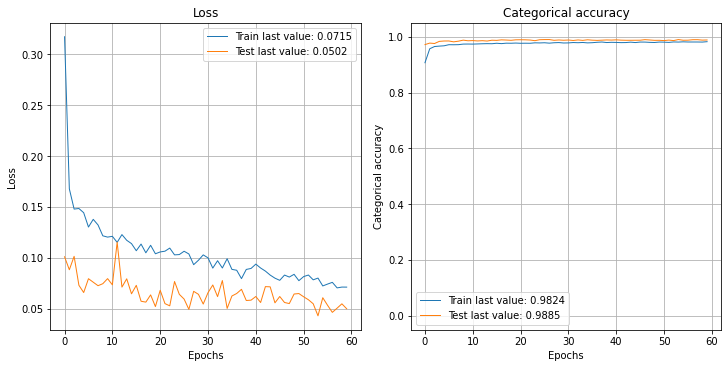

In [11]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt


show_history(history)
plot_history(history, path="standard.png")
plt.close()

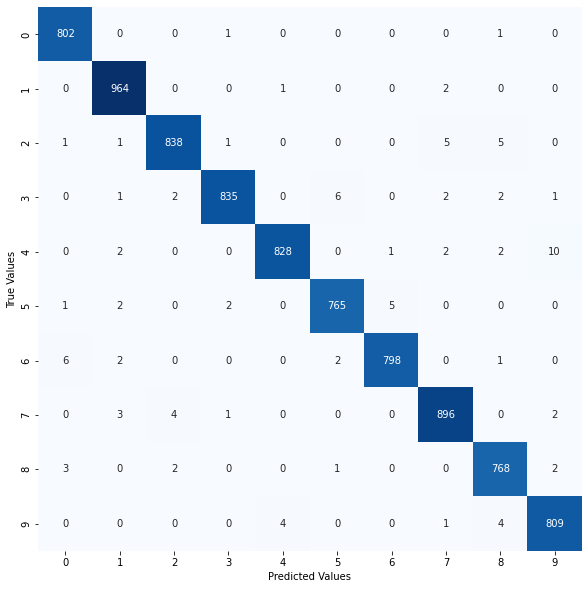

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(x_test) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();


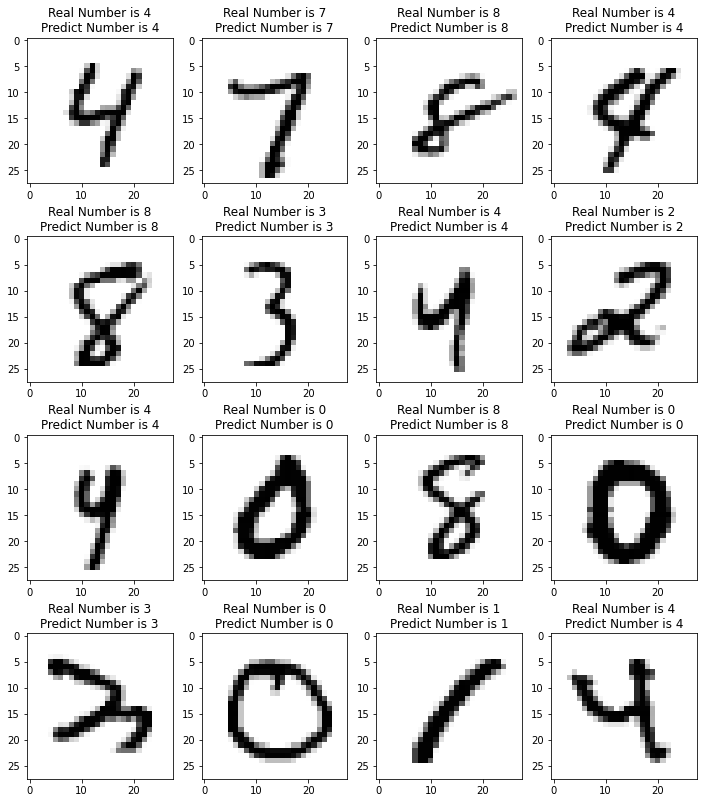

In [13]:
y_pred = model.predict(x_test)
x_test__ = tf.reshape(x_test,[x_test.shape[0], 28, 28])

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");